<a href="https://colab.research.google.com/github/joowop/Metaverse_AI_Project/blob/main/groundingdino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/IDEA-Research/GroundingDINO

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 401, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 401 (delta 52), reused 44 (delta 44), pack-reused 324
Receiving objects: 100% (401/401), 12.84 MiB | 31.09 MiB/s, done.
Resolving deltas: 100% (205/205), done.


In [2]:
!pwd

/content


In [3]:
import os
os.chdir('/content/GroundingDINO')

In [4]:
!pwd

/content/GroundingDINO


In [5]:
!pip install -q -e .

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.3 MB/s eta 0:00:00


In [6]:
CONFIG_PATH = 'groundingdino/config/GroundingDINO_SwinT_OGC.py'

In [7]:
os.chdir('/content')
os.makedirs('weights')

In [8]:
os.chdir('/content/weights')

In [9]:
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

In [10]:
WEIGHTS_NAME = 'groundingdino_swint_ogc.pth'
WEIGHTS_PATH = '/content/weights/groundingdino_swint_ogc.pth'

In [11]:
os.chdir('/content')
os.makedirs('data')

In [12]:
os.chdir('/content/data')

In [13]:
!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

In [14]:
os.chdir('/content/GroundingDINO')

In [15]:
from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


In [16]:
from transformers import image_transforms
import numpy as np
from PIL import Image
import groundingdino.datasets.transforms as T

def inference(img, prompt, box_threshold=0.35, text_threshold=0.25):
    transform = T.Compose(
        [T.RandomResize([800], max_size=1333),
         T.ToTensor(),
         T.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
         ]
    )

    image_transformed, _ = transform(Image.fromarray(img), None)

    boxes, logits, phrases = predict(
        model = model,
        image = image_transformed,
        caption = prompt,
        box_threshold=box_threshold,
        text_threshold=text_threshold
    )

    annotated_frame = annotate(image_source=img, boxes=boxes, logits=logits, phrases=phrases)

    return annotated_frame

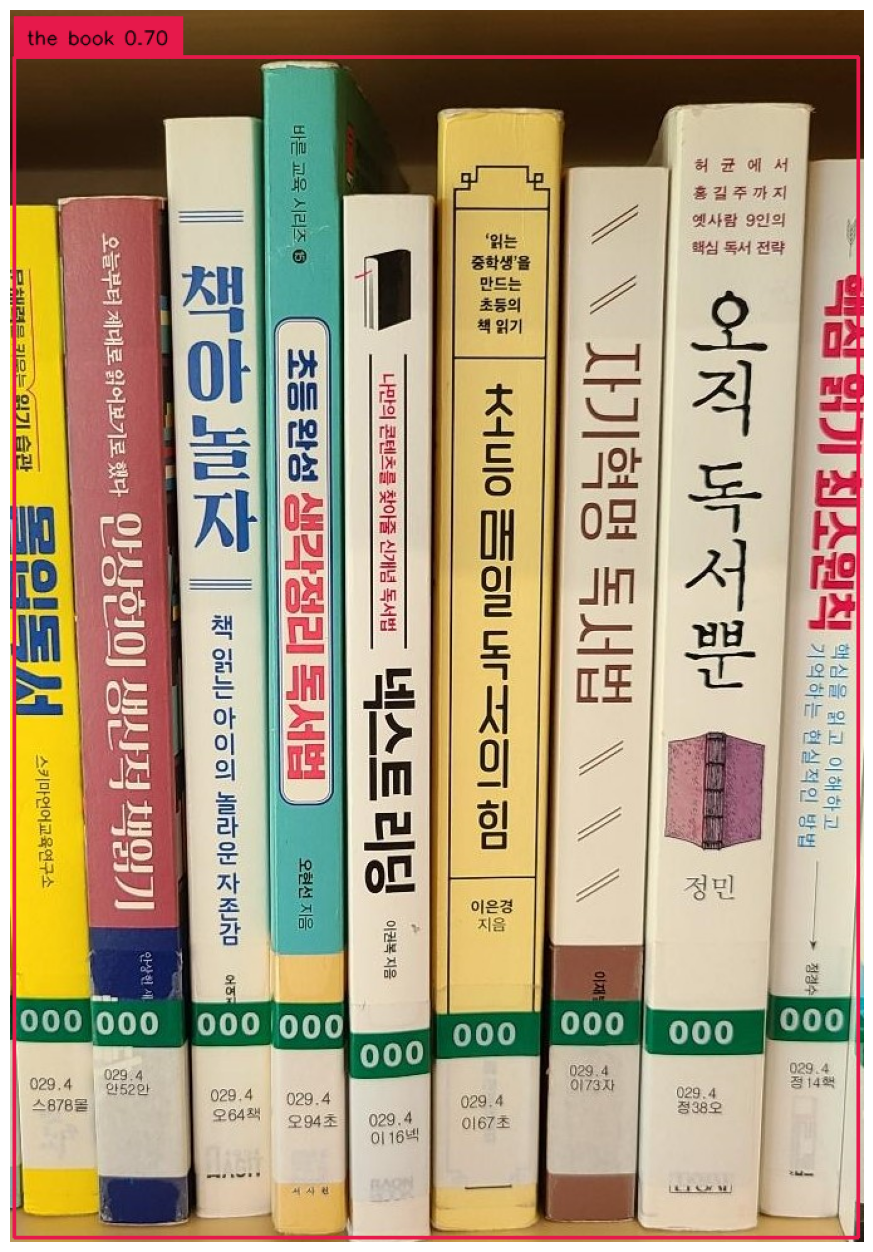

In [30]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/data/000-3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result_img = inference(img, 'labeling the book')

plt.figure(figsize=(16,16))
plt.imshow(result_img[:,:,::-1])
plt.axis('off')
plt.show()